In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("FortniteGroupedByFrameData.csv")

In [2]:
new_df = df[["FrameRate","Mean(GPUBusyTicksDelta)", "Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_READ)", "Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_WRITE)", "Mean(hw.raw.BMG_AMX_20_WW30.SAMPLER_ACTIVE_CYCLES)", "Mean(hw.md.BMG_AMX_20_WW30.std.dispatch.tdg_tdc.active.cycles)","Mean(hw.md.BMG_AMX_20_WW30.std.geom.ds.cache.hit)","Mean(hw.md.BMG_AMX_20_WW30.std.geom.ds.cache.miss)","Mean(hw.md.BMG_AMX_20_WW30.std.geom.gs_ms_sol.active.cycles)","Mean(hw.md.BMG_AMX_20_WW30.std.geom.hs_task_te.active.cycles)", "Mean(hw.md.BMG_AMX_20_WW30.std.geom.sol_cl.active.cycles)", "Mean(hw.md.BMG_AMX_20_WW30.std.geom.te_ted.active.cycles)","Mean(hw.md.BMG_AMX_20_WW30.std.geom.ted_te.active.cycles)", "Mean(hw.md.BMG_AMX_20_WW30.std.geom.vf.cache.hit)","Mean(hw.md.BMG_AMX_20_WW30.std.geom.vf.cache.miss)","Mean(hw.md.BMG_AMX_20_WW30.std.geom.vf_vs.active.cycles)","Mean(hw.md.BMG_AMX_20_WW30.std.geom.vfg_vf.active.cycles)","Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit)","Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss)","Mean(hw.md.BMG_AMX_20_WW30.std.l3.bank_node.data.evict.active.cycles)","Mean(hw.md.BMG_AMX_20_WW30.std.l3.bank_node.data.rd_return.active.cycles)", "Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit)", "Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss)", "Mean(hw.raw.BMG_AMX_20_WW30.XVE_THREADS_OCCUPANCY_CS_CYCLES)"]]
new_df["BP/B"] = new_df["Mean(hw.raw.BMG_AMX_20_WW30.XVE_THREADS_OCCUPANCY_CS_CYCLES)"]/new_df["FrameRate"]
new_df.head()

C:\Users\hvargant\AppData\Local\Temp\ipykernel_20412\1892582484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["BP/B"] = new_df["Mean(hw.raw.BMG_AMX_20_WW30.XVE_THREADS_OCCUPANCY_CS_CYCLES)"]/new_df["FrameRate"]


,FrameRate,Mean(GPUBusyTicksDelta),Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_READ),Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_WRITE),Mean(hw.raw.BMG_AMX_20_WW30.SAMPLER_ACTIVE_CYCLES),Mean(hw.md.BMG_AMX_20_WW30.std.dispatch.tdg_tdc.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.ds.cache.hit),Mean(hw.md.BMG_AMX_20_WW30.std.geom.ds.cache.miss),Mean(hw.md.BMG_AMX_20_WW30.std.geom.gs_ms_sol.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.hs_task_te.active.cycles),...,Mean(hw.md.BMG_AMX_20_WW30.std.geom.vf_vs.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vfg_vf.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss),Mean(hw.md.BMG_AMX_20_WW30.std.l3.bank_node.data.evict.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.l3.bank_node.data.rd_return.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss),Mean(hw.raw.BMG_AMX_20_WW30.XVE_THREADS_OCCUPANCY_CS_CYCLES),BP/B
0,33.783099,0,304904.78518,156681.839400,147423.432400,43.547701,0,0,207.995196,207.292382,...,294.320522,1.589568,209.575154,196.518874,12929.559369,50038.137268,209.575154,196.518874,2.393526e+06,70849.803419
1,19.594396,0,196378.33745,100367.451300,98603.146776,108.883402,0,0,404.072359,403.721193,...,451.675240,3.289781,266.197188,521.204733,9744.628601,33035.829904,266.197188,521.204733,1.783075e+06,90999.254554
2,16.555798,0,194096.72531,109943.661360,87064.337736,96.207145,0,0,358.260883,357.953467,...,400.154008,3.379165,233.203542,461.509156,8639.044731,29454.571900,233.203542,461.509156,1.883479e+06,113765.533339
3,17.142808,0,179277.58547,91026.675016,90008.605197,98.225736,0,0,361.729806,361.409205,...,405.074202,3.047589,232.711647,471.402317,8862.493112,30218.721039,232.711647,471.402317,2.045858e+06,119342.071068
4,19.949090,0,226972.76608,128164.093290,101190.882690,110.616961,0,0,406.789753,406.427915,...,455.473498,3.243110,262.170671,531.018375,10109.308127,34295.744170,262.170671,531.018375,1.857695e+06,93121.810161


In [3]:
window = 25

target_col = "FrameRate"
feature_cols = new_df.columns.drop(target_col)

rolling_z = (
    new_df[feature_cols]
    .rolling(window=window, min_periods=1)
    .apply(lambda x: (x.iloc[-1] - x.mean()) / x.std(), raw=False)
)


result_df = pd.concat([new_df[[target_col]], rolling_z], axis=1)

result_df.head()

,FrameRate,Mean(GPUBusyTicksDelta),Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_READ),Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_WRITE),Mean(hw.raw.BMG_AMX_20_WW30.SAMPLER_ACTIVE_CYCLES),Mean(hw.md.BMG_AMX_20_WW30.std.dispatch.tdg_tdc.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.ds.cache.hit),Mean(hw.md.BMG_AMX_20_WW30.std.geom.ds.cache.miss),Mean(hw.md.BMG_AMX_20_WW30.std.geom.gs_ms_sol.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.hs_task_te.active.cycles),...,Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss),Mean(hw.md.BMG_AMX_20_WW30.std.l3.bank_node.data.evict.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.l3.bank_node.data.rd_return.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss),Mean(hw.raw.BMG_AMX_20_WW30.XVE_THREADS_OCCUPANCY_CS_CYCLES),BP/B
0,33.783099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19.594396,NaN,-0.707107,-0.707107,-0.707107,0.707107,NaN,NaN,0.707107,0.707107,...,0.707107,0.707107,-0.707107,-0.707107,0.707107,0.707107,0.707107,0.707107,-0.707107,0.707107
2,16.555798,NaN,-0.595271,-0.411108,-0.747976,0.384673,NaN,NaN,0.339454,0.340200,...,0.395966,0.395966,-0.807442,-0.732476,-0.109767,-0.109767,0.395966,0.395966,-0.417153,1.019694
3,17.142808,NaN,-0.679184,-0.805171,-0.559208,0.392673,NaN,NaN,0.334252,0.334721,...,0.401138,0.401138,-0.596060,-0.564262,-0.116363,-0.116363,0.401138,0.401138,0.072403,0.925100
4,19.949090,NaN,0.131986,0.420590,-0.149666,0.694217,NaN,NaN,0.725181,0.724407,...,0.689011,0.689011,0.030465,-0.132240,0.912491,0.912491,0.689011,0.689011,-0.554058,-0.231046


In [4]:
final_df = result_df.dropna(axis=1, how='all')

In [5]:
from scipy.spatial.distance import mahalanobis

window = 25
df_outliers = final_df.copy()  
feature_cols = df_outliers.columns.drop("FrameRate")

scores = np.full(len(df_outliers), np.nan)

for i in range(window - 1, len(df_outliers)):
    window_data = df_outliers.iloc[i - window + 1 : i + 1][feature_cols].dropna()
    
    if len(window_data) < 3:
        continue  
    
    mean_vec = window_data.mean().values
    cov_matrix = np.cov(window_data.values, rowvar=False)
    inv_cov = np.linalg.pinv(cov_matrix)  

    dists = [
        mahalanobis(row, mean_vec, inv_cov)
        for row in window_data.values
    ]
    
    dists_z = (dists - np.mean(dists)) / np.std(dists)
    
    scores[i] = dists_z[-1]

df_outliers["outlier_score"] = scores

df_outliers["is_outlier"] = np.abs(df_outliers["outlier_score"]) > 3

df_outliers[["FrameRate", "outlier_score", "is_outlier"]].head(10)

,FrameRate,outlier_score,is_outlier
0,33.783099,NaN,False
1,19.594396,NaN,False
2,16.555798,NaN,False
3,17.142808,NaN,False
4,19.949090,NaN,False
5,11.719524,NaN,False
6,20.067427,NaN,False
7,19.569433,NaN,False
8,16.739175,NaN,False
9,16.991863,NaN,False


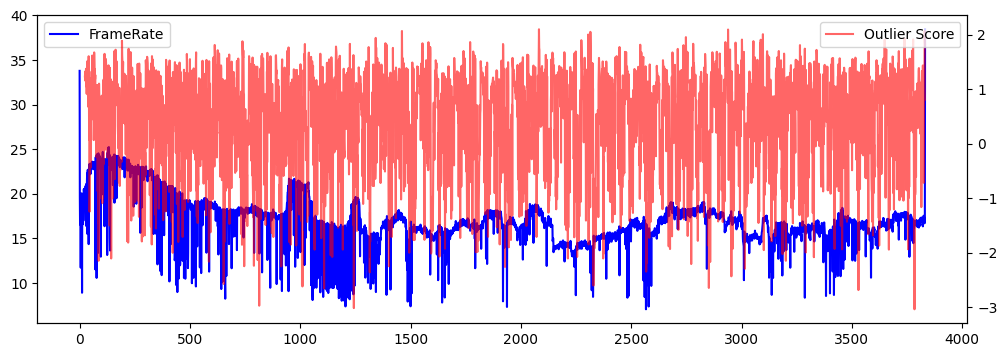

In [6]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(df_outliers["FrameRate"], color='blue', label='FrameRate')
ax2 = ax1.twinx()
ax2.plot(df_outliers["outlier_score"], color='red', alpha=0.6, label='Outlier Score')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

C:\Users\hvargant\AppData\Local\Temp\ipykernel_20412\3459781222.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["FrameRate_roll"] = final_df["FrameRate"].rolling(window=window, min_periods=1).mean()
C:\Users\hvargant\AppData\Local\Temp\ipykernel_20412\3459781222.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["FrameRate_ema"] = final_df["FrameRate"].ewm(span=ema_span, adjust=False).mean()
C:\Users\hvargant\AppData\Local\Temp\ipykernel_20412\3459781222.py:19: SettingWithCopyWarnin

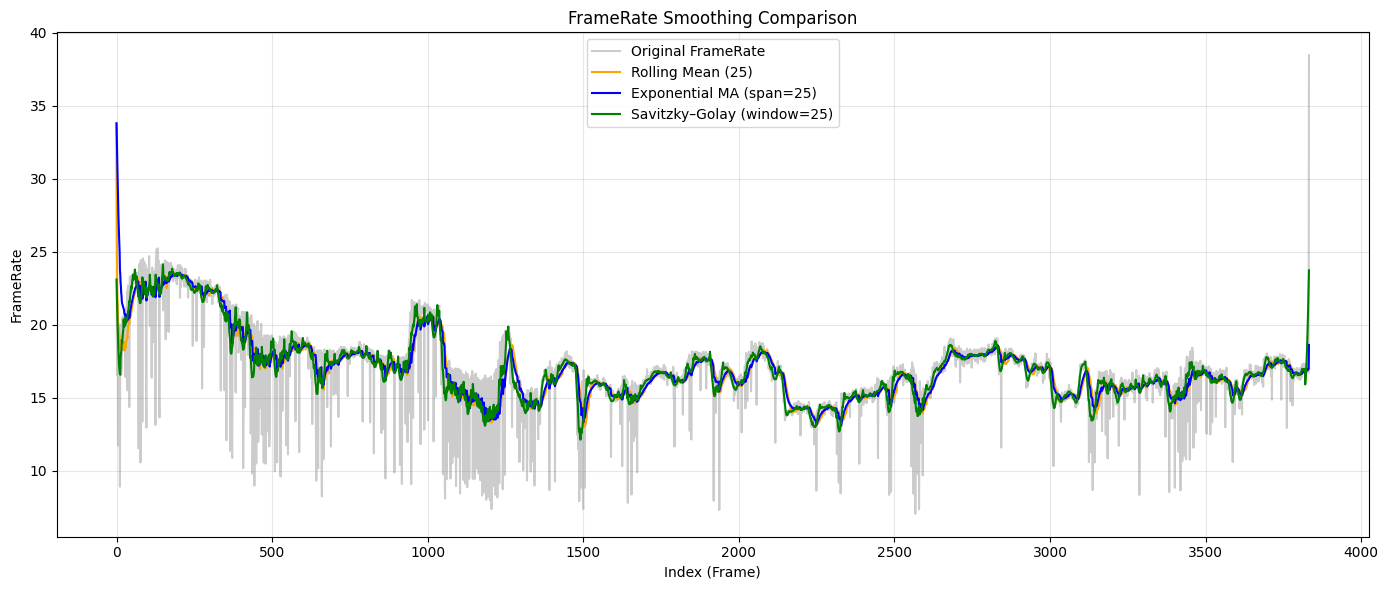

In [7]:
from scipy.signal import savgol_filter

# Assume your dataframe is already loaded as new_df
# and contains a 'FrameRate' column

# --- Parameters ---
window = 25  # for rolling & savgol
ema_span = 25  # for exponential moving average

# --- 1️⃣ Rolling Mean ---
final_df["FrameRate_roll"] = final_df["FrameRate"].rolling(window=window, min_periods=1).mean()

# --- 2️⃣ Exponential Moving Average (EMA) ---
final_df["FrameRate_ema"] = final_df["FrameRate"].ewm(span=ema_span, adjust=False).mean()

# --- 3️⃣ Savitzky–Golay Filter ---
# window_length must be odd and <= len(data)
savgol_window = min(window if window % 2 == 1 else window + 1, len(final_df) - 1)
final_df["FrameRate_savgol"] = savgol_filter(final_df["FrameRate"], window_length=savgol_window, polyorder=2)

# --- 🧭 Plot Comparison ---
plt.figure(figsize=(14,6))
plt.plot(final_df["FrameRate"], color='gray', alpha=0.4, label='Original FrameRate')
plt.plot(final_df["FrameRate_roll"], color='orange', label=f'Rolling Mean ({window})')
plt.plot(final_df["FrameRate_ema"], color='blue', label=f'Exponential MA (span={ema_span})')
plt.plot(final_df["FrameRate_savgol"], color='green', label=f'Savitzky–Golay (window={savgol_window})')

plt.title("FrameRate Smoothing Comparison")
plt.xlabel("Index (Frame)")
plt.ylabel("FrameRate")
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
window = 25
df = final_df.copy()

target_col = "FrameRate_savgol"  # pick your smoothed one
feature_cols = df.columns.drop(["FrameRate", target_col, "FrameRate_roll", "FrameRate_savgol"])  # exclude raw FrameRate

outlier_scores = np.full(len(df), np.nan)

for i in range(window - 1, len(df)):
    # define rolling window
    window_df = df.iloc[i - window + 1 : i + 1][feature_cols].dropna()
    
    # skip if insufficient valid data
    if len(window_df) < 3:
        continue

    mean_vec = window_df.mean().values
    cov_matrix = np.cov(window_df.values, rowvar=False)
    inv_cov = np.linalg.pinv(cov_matrix)  # pseudo-inverse for stability

    # compute Mahalanobis distance for each row
    dists = [mahalanobis(row, mean_vec, inv_cov) for row in window_df.values]

    # convert to z-score within the window
    z_dists = (dists - np.mean(dists)) / np.std(dists)

    # record the z-score for the latest row in the window
    outlier_scores[i] = z_dists[-1]

# attach results
df["outlier_score"] = outlier_scores
df["is_outlier"] = np.abs(df["outlier_score"]) > 2.5  # threshold for anomaly

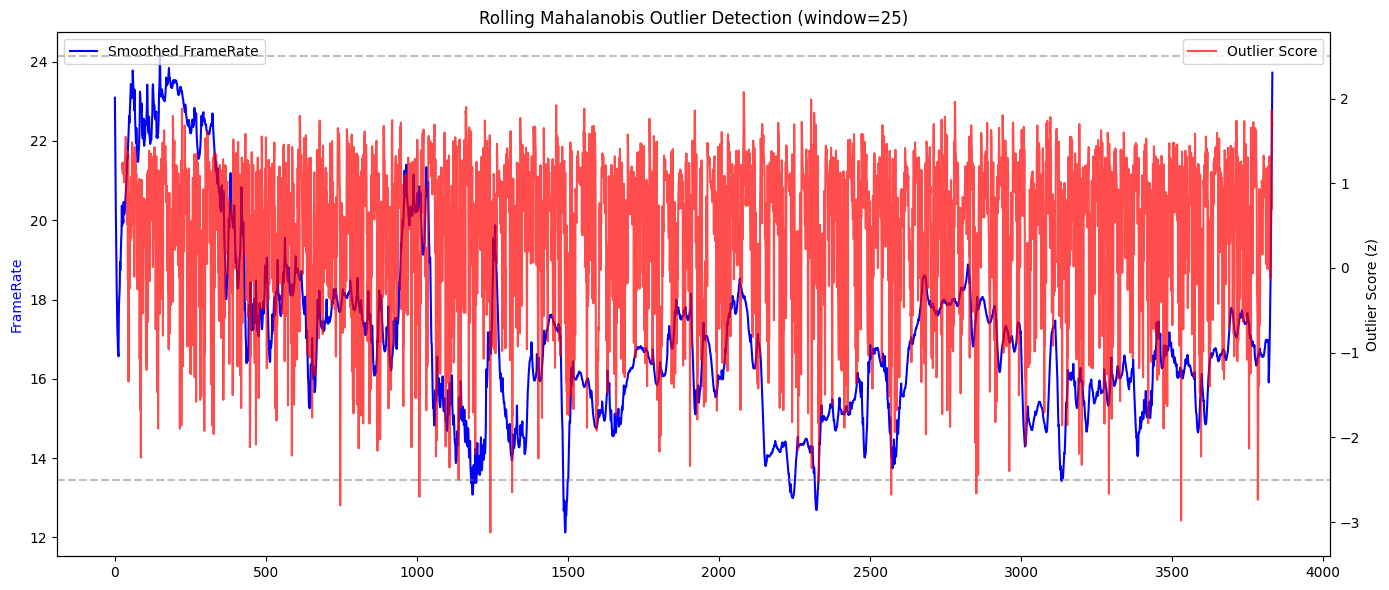

In [9]:
fig, ax1 = plt.subplots(figsize=(14,6))

ax1.plot(df[target_col], color='blue', label='Smoothed FrameRate')
ax1.set_ylabel('FrameRate', color='blue')

ax2 = ax1.twinx()
ax2.plot(df["outlier_score"], color='red', alpha=0.7, label='Outlier Score')
ax2.set_ylabel('Outlier Score (z)')
ax2.axhline(2.5, color='gray', linestyle='--', alpha=0.5)
ax2.axhline(-2.5, color='gray', linestyle='--', alpha=0.5)

plt.title("Rolling Mahalanobis Outlier Detection (window=25)")
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [10]:
df[df["is_outlier"]==True]

,FrameRate,Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_READ),Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_WRITE),Mean(hw.raw.BMG_AMX_20_WW30.SAMPLER_ACTIVE_CYCLES),Mean(hw.md.BMG_AMX_20_WW30.std.dispatch.tdg_tdc.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.gs_ms_sol.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.hs_task_te.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.sol_cl.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vf.cache.hit),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vf.cache.miss),...,Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss),Mean(hw.raw.BMG_AMX_20_WW30.XVE_THREADS_OCCUPANCY_CS_CYCLES),BP/B,FrameRate_roll,FrameRate_ema,FrameRate_savgol,outlier_score,is_outlier
746,18.079521,0.745675,0.915062,0.095197,1.206089,1.314976,1.314994,1.314976,1.277080,1.363476,...,1.346263,1.206105,1.206105,-0.254614,-0.250089,17.925897,17.805221,17.725618,-2.800377,True
1008,20.809879,0.622520,0.780468,0.252135,0.123498,-0.256279,-0.257276,-0.256279,-0.137803,-0.466231,...,-0.461769,0.118014,0.118014,-0.280859,-0.262863,20.348174,20.357709,20.849876,-2.700317,True
1243,19.138719,0.493233,0.263727,0.817299,-0.878029,-0.670476,-0.671554,-0.670476,-0.853434,0.167979,...,0.062432,-0.912469,-0.912469,-0.291233,-0.598541,15.667749,15.556776,16.742409,-3.121071,True
1315,15.022910,0.086354,-0.139808,-0.326801,-0.150341,-0.235058,-0.235429,-0.235058,-0.195741,-0.634576,...,-0.805088,-0.169168,-0.169168,-0.715764,-0.440259,14.720639,14.756612,13.969682,-2.645687,True
2331,14.682671,0.344383,0.034611,1.312701,-0.797669,-0.785882,-0.785730,-0.785882,-0.801181,-0.717942,...,-0.663335,-0.774336,-0.774336,0.052377,-0.358475,13.402826,13.372857,13.861429,-2.519691,True
2570,16.337307,0.254471,0.557071,0.211817,1.480280,1.453215,1.452872,1.453215,1.470261,0.052606,...,0.056530,1.473332,1.473332,-0.439905,-0.346610,15.566766,15.415564,14.087650,-2.674770,True
2852,17.662415,0.065623,0.560327,0.157699,-0.496418,-0.458042,-0.458035,-0.458042,-0.492173,-0.314107,...,-0.285816,-0.497585,-0.497585,-0.177730,-0.151894,17.577372,17.608231,17.659768,-2.660134,True
3291,15.823536,0.095807,-0.372290,0.096731,-0.007066,-0.116761,-0.117025,-0.116761,-0.048397,-0.591771,...,-0.493069,-0.008743,-0.008743,0.025916,-0.125271,15.618930,15.559948,15.403168,-2.664478,True
3530,16.224206,0.462938,0.482529,0.063675,0.954939,0.681641,0.682980,0.681641,0.878748,-0.863547,...,-0.695497,0.979086,0.979086,-0.360578,-0.160408,16.324624,16.324999,16.091287,-2.980691,True
3784,16.532779,0.103793,0.724998,0.644658,-0.816144,-0.785252,-0.786107,-0.785252,-0.818742,-0.212476,...,-0.251172,-0.827133,-0.827133,-0.613235,-0.281356,16.623914,16.687090,16.556617,-2.734482,True


In [11]:
final_df["FrameRate_savgol"] = final_df["FrameRate_savgol"].round().astype(int)

C:\Users\hvargant\AppData\Local\Temp\ipykernel_20412\3315747538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df["FrameRate_savgol"] = final_df["FrameRate_savgol"].round().astype(int)


In [12]:
def mahalanobis_per_group_vectorized(df, feature_cols, group_col='FrameRate_savgol'):
    # Container for distances
    mahal_distances = np.zeros(len(df))
    
    # Process each group
    for fr, group_idx in df.groupby(group_col).groups.items():
        X = df.loc[group_idx, feature_cols].values
        
        # Compute mean and covariance
        mean_vec = X.mean(axis=0)
        cov_matrix = np.cov(X, rowvar=False)
        cov_matrix += np.eye(cov_matrix.shape[0]) * 1e-8  # regularization
        inv_cov_matrix = np.linalg.inv(cov_matrix)
        
        # Vectorized Mahalanobis: (x - mean) @ inv_cov @ (x - mean).T
        diff = X - mean_vec
        m_dist_sq = np.einsum('ij,jk,ik->i', diff, inv_cov_matrix, diff)
        mahal_distances[group_idx] = np.sqrt(m_dist_sq)
    
    df['mahalanobis'] = mahal_distances
    return df

# Usage:
feature_cols = ['Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_READ)',
       'Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_WRITE)',
       'Mean(hw.raw.BMG_AMX_20_WW30.SAMPLER_ACTIVE_CYCLES)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.dispatch.tdg_tdc.active.cycles)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.gs_ms_sol.active.cycles)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.hs_task_te.active.cycles)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.sol_cl.active.cycles)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vf.cache.hit)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vf.cache.miss)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vf_vs.active.cycles)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vfg_vf.active.cycles)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.l3.bank_node.data.evict.active.cycles)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.l3.bank_node.data.rd_return.active.cycles)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss)',
       'Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss)',
       'Mean(hw.raw.BMG_AMX_20_WW30.XVE_THREADS_OCCUPANCY_CS_CYCLES)', 'BP/B']  # replace with your features
df = mahalanobis_per_group_vectorized(final_df, feature_cols)

C:\Users\hvargant\AppData\Local\Temp\ipykernel_20412\121014599.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mahalanobis'] = mahal_distances


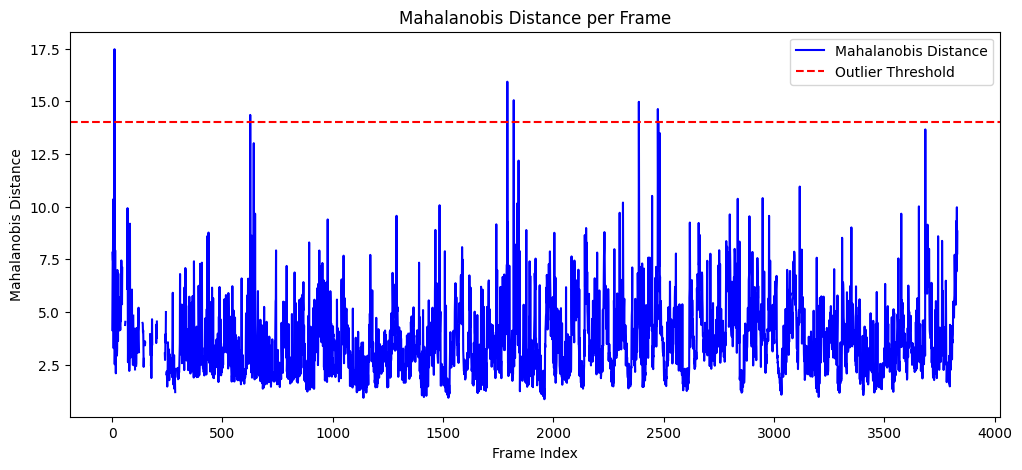

In [13]:
plt.figure(figsize=(12,5))
plt.plot(df.index, df['mahalanobis'], color='blue', linewidth=1.5, label='Mahalanobis Distance')

# Optional: horizontal line to mark an outlier threshold
threshold = 14 #df['mahalanobis'].mean() + 3 * df['mahalanobis'].std()
plt.axhline(y=threshold, color='red', linestyle='--', label='Outlier Threshold')

plt.xlabel('Frame Index')
plt.ylabel('Mahalanobis Distance')
plt.title('Mahalanobis Distance per Frame')
plt.legend()
plt.show()

In [14]:
df.iloc[np.arange(8,14),:]

,FrameRate,Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_READ),Mean(hw.raw.BMG_AMX_20_WW30.GPU_MEMORY_BYTE_WRITE),Mean(hw.raw.BMG_AMX_20_WW30.SAMPLER_ACTIVE_CYCLES),Mean(hw.md.BMG_AMX_20_WW30.std.dispatch.tdg_tdc.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.gs_ms_sol.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.hs_task_te.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.sol_cl.active.cycles),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vf.cache.hit),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vf.cache.miss),...,Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.hit),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss),Mean(hw.md.BMG_AMX_20_WW30.std.geom.vs.cache.miss),Mean(hw.raw.BMG_AMX_20_WW30.XVE_THREADS_OCCUPANCY_CS_CYCLES),BP/B,FrameRate_roll,FrameRate_ema,FrameRate_savgol,mahalanobis
8,16.739175,-0.134648,0.097618,-0.396812,0.168413,0.091126,0.091769,0.091126,0.131615,-0.135784,...,-0.185544,-0.185544,0.157778,0.157778,0.304965,0.302555,19.457861,26.155417,17,5.820823
9,16.991863,-0.554456,-0.706938,-0.326318,0.289628,0.194162,0.194638,0.194162,0.253812,-0.134383,...,-0.148897,-0.148897,0.286174,0.286174,0.383843,0.284423,19.211261,25.450528,17,4.475217
10,19.329835,0.459721,0.613372,0.092564,0.854207,0.815511,0.814906,0.815511,0.992892,1.692599,...,0.564699,0.564699,0.847231,0.847231,-0.864871,-0.501216,19.222041,24.979706,17,8.937731
11,8.908511,-1.842306,-1.846440,-1.816590,-1.506306,-1.764577,-1.761912,-1.764577,-1.569148,-2.098007,...,-2.345040,-2.345040,-1.467078,-1.467078,2.295035,2.714343,18.362580,23.743460,17,17.468795
12,20.012368,0.576131,0.756966,0.337144,0.838126,0.837485,0.837075,0.837485,0.806125,0.596342,...,0.779880,0.779880,0.824240,0.824240,-0.614946,-0.490065,18.489487,23.456453,17,2.511000
13,16.657006,-0.501431,-0.642542,-0.290986,0.172429,0.089986,0.090439,0.089986,0.148296,0.002410,...,-0.143186,-0.143186,0.167611,0.167611,0.228459,0.028977,18.358595,22.933419,18,5.948229
